**author**: serene1030@gmail.com<br>
**date**: 15 Jun 2017<br>
**language**: Python 3.5<br>
**license**: BSD3<br>

## effect_size_rda.ipynb

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
from statsmodels.sandbox.stats.multicomp import multipletests

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# check FDR threshold
multipletests(np.repeat(0.002, 4), method = 'fdr_bh')[1]

array([ 0.002,  0.002,  0.002,  0.002])

In [3]:
alpha = pd.DataFrame({'type': np.tile(['Independent', 'Cumulative'], 4), 
                      'covariate': np.repeat(['study_id', 'empo_3', 'host_scientific_name', 'envo_biome_3'], 2),
                     'value_ES': [0.847, 0.847, 0.8, 0.024, 0.839, 0.0024, 0.817, 0.0007]})

In [4]:
alpha

,covariate,type,value_ES
0,study_id,Independent,0.8470
1,study_id,Cumulative,0.8470
2,empo_3,Independent,0.8000
3,empo_3,Cumulative,0.0240
4,host_scientific_name,Independent,0.8390
5,host_scientific_name,Cumulative,0.0024
6,envo_biome_3,Independent,0.8170
7,envo_biome_3,Cumulative,0.0007


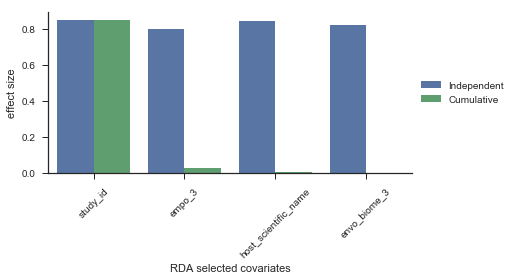

In [5]:
sns.set_style("ticks")
fig, ax = plt.subplots()
fig = sns.barplot(x='covariate', y='value_ES', hue='type', data=alpha)
fig.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.set(xlabel='RDA selected covariates', ylabel='effect size')
sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
sns.despine()
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('alpha_ef.pdf')

In [6]:
######## beta_unweighted ##########

In [7]:
# check FDR threshold
multipletests(np.hstack([np.repeat(0.002, 4), 0.008]), method = 'fdr_bh')[1]

array([ 0.0025,  0.0025,  0.0025,  0.0025,  0.008 ])

In [8]:
beta_uw = pd.DataFrame({'type': np.tile(['Independent', 'Cumulative'], 5), 
                      'covariate': np.repeat(['study_id', 'empo_3', 'host_scientific_name', 'envo_biome_3', 'longitude_deg'], 2),
                     'value_ES': [0.544, 0.544, 0.442, 0.151, 0.511, 0.003, 0.403, 0.001, 0.237, 0.0002]})

In [9]:
beta_uw

,covariate,type,value_ES
0,study_id,Independent,0.5440
1,study_id,Cumulative,0.5440
2,empo_3,Independent,0.4420
3,empo_3,Cumulative,0.1510
4,host_scientific_name,Independent,0.5110
5,host_scientific_name,Cumulative,0.0030
6,envo_biome_3,Independent,0.4030
7,envo_biome_3,Cumulative,0.0010
8,longitude_deg,Independent,0.2370
9,longitude_deg,Cumulative,0.0002


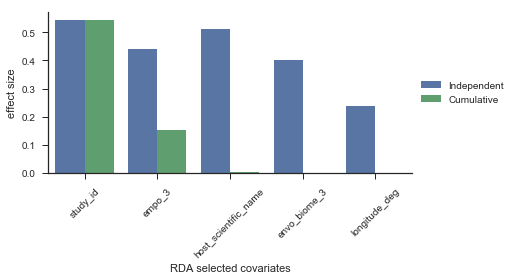

In [10]:
sns.set_style("ticks")
fig, ax = plt.subplots()
fig = sns.barplot(x='covariate', y='value_ES', hue='type', data=beta_uw)
fig.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.set(xlabel='RDA selected covariates', ylabel='effect size')
sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
sns.despine()
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('beta_uw_ef.pdf')

In [11]:
######## beta_weighted ##########

In [12]:
# check FDR threshold
multipletests(np.repeat(0.002, 5), method = 'fdr_bh')[1]

array([ 0.002,  0.002,  0.002,  0.002,  0.002])

In [13]:
beta_w = pd.DataFrame({'type': np.tile(['Independent', 'Cumulative'], 5), 
                      'covariate': np.repeat(['study_id', 'empo_3', 'host_scientific_name', 'envo_biome_3', 'longitude_deg'], 2),
                     'value_ES': [0.427, 0.427, 0.401, 0.185, 0.371, 0.004, 0.143, 0.002, 0.272, 0.0004]})

In [14]:
beta_w

,covariate,type,value_ES
0,study_id,Independent,0.4270
1,study_id,Cumulative,0.4270
2,empo_3,Independent,0.4010
3,empo_3,Cumulative,0.1850
4,host_scientific_name,Independent,0.3710
5,host_scientific_name,Cumulative,0.0040
6,envo_biome_3,Independent,0.1430
7,envo_biome_3,Cumulative,0.0020
8,longitude_deg,Independent,0.2720
9,longitude_deg,Cumulative,0.0004


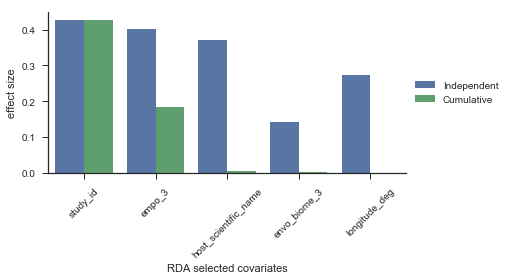

In [15]:
sns.set_style("ticks")
fig, ax = plt.subplots()
fig = sns.barplot(x='covariate', y='value_ES', hue='type', data=beta_w)
fig.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.set(xlabel='RDA selected covariates', ylabel='effect size')
sns.plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
sns.despine()
fig = fig.get_figure()
fig.tight_layout()
fig.savefig('beta_w_ef.pdf')